In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Load the MNIST dataset from Keras

In [6]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [7]:
print("Training samples:", len(x_train))
print("Testing samples:", len(x_test))
print("Shape of individual images:", x_train[0].shape)

Training samples: 60000
Testing samples: 10000
Shape of individual images: (28, 28)


In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

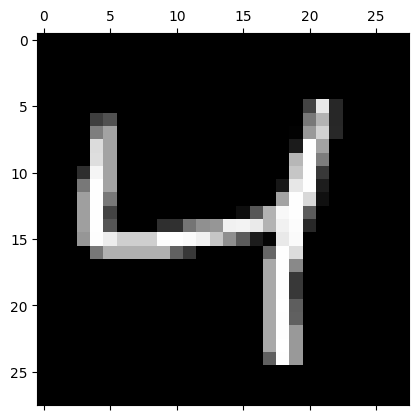

In [9]:
plt.matshow(x_train[2], cmap='gray')

In [10]:
y_train[1]

0

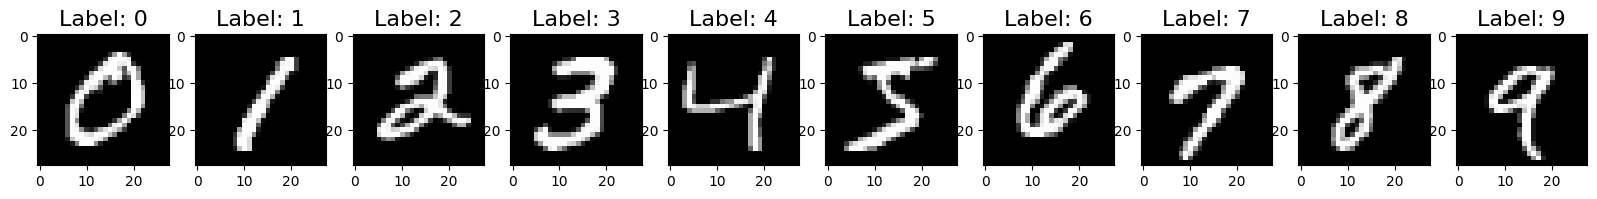

In [11]:
num_classes = 10

f, ax = plt.subplots(1, num_classes, figsize=(20, 20))
for i in range(num_classes):
    sample = x_train[y_train == i][0]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title(f"Label: {i}", fontsize=16)

Scale the data to the range of [0, 1] and reshape it to a 1D array.

In [12]:
x_train = x_train / 255
x_test = x_test / 255

In [13]:
x_train[2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
# Flatten the image
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [15]:
print(x_train.shape)
print(x_train_flattened.shape)

(60000, 28, 28)
(60000, 784)


# Create a inital Nural Network using Keras
We will initially use a simple network that only has an input layer and an output layer. The input layer will have 784 neurons (28x28) and the output layer will have 10 neurons (one for each digit).

In [16]:
model = keras.Sequential(
    [
        keras.layers.Dense(10, input_shape=(784, ), activation='sigmoid')
    ]
)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 683us/step - loss: 0.4715 - accuracy: 0.8769
Epoch 2/5
1875/1875 [==============================] - 1s 704us/step - loss: 0.3042 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 1s 699us/step - loss: 0.2837 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 1s 698us/step - loss: 0.2737 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 1s 705us/step - loss: 0.2666 - accuracy: 0.9254


In [17]:
y_predicted = model.predict(x_test_flattened)

313/313 [==============================] - 0s 554us/step


In [18]:
y_predicted[1]

array([3.7953100e-01, 6.5905116e-03, 9.9909157e-01, 4.0978253e-01,
       4.8246623e-10, 8.2469767e-01, 8.6200547e-01, 1.4147111e-12,
       1.3729762e-01, 2.2141862e-09], dtype=float32)

In [19]:
np.argmax(y_predicted[1])

2

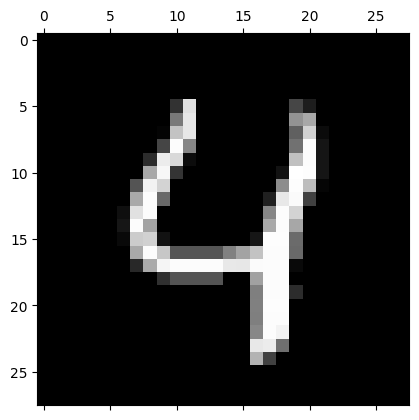

In [20]:
plt.matshow(x_test[4], cmap='gray')

In [21]:
y_test[1]

2

Create labels

In [22]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [23]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

Check against the first 10 labels

In [24]:
print(y_predicted_labels[:10])
print(', '.join([str(c) for c in y_test[:10]]))

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]
7, 2, 1, 0, 4, 1, 4, 9, 5, 9


Create a Confusion Matrix

In [25]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    0,    2,    0,    7,    7,    3,    3,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   8,   11,  898,   24,   11,    5,   12,   13,   46,    4],
       [   3,    0,   16,  928,    0,   19,    2,   13,   23,    6],
       [   1,    1,    2,    1,  921,    0,   12,    5,   10,   29],
       [  10,    3,    2,   35,    9,  776,   15,    7,   29,    6],
       [  11,    3,    6,    1,    8,   14,  912,    2,    1,    0],
       [   1,    6,   16,    9,    4,    0,    0,  968,    3,   21],
       [   5,    8,    5,   22,    9,   29,    9,   14,  868,    5],
       [  11,    7,    1,   10,   31,    7,    0,   34,    6,  902]])>

Text(95.72222222222221, 0.5, 'Truth')

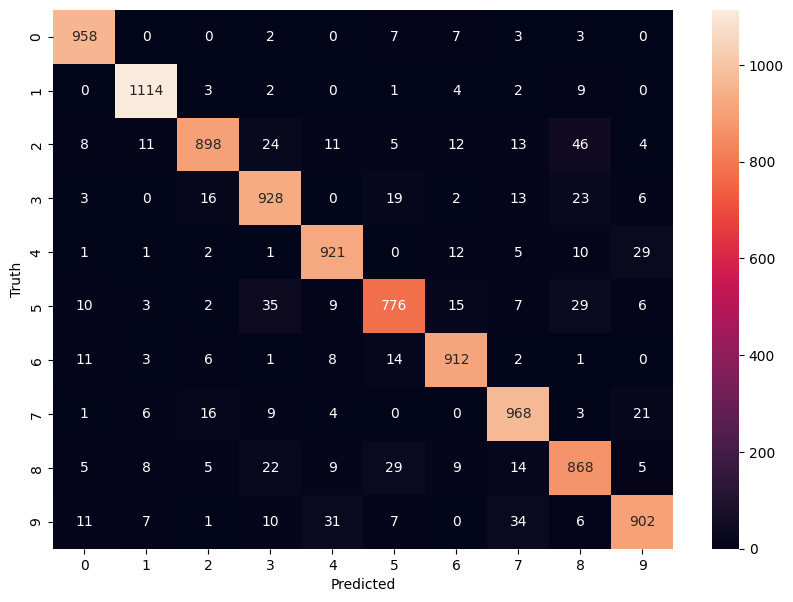

In [26]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')

Show some errors

In [27]:
errors = (y_predicted_labels - y_test != 0)
errors

array([False, False, False, ..., False, False, False])

In [28]:
y_error_indexes = [i for i, error in enumerate(errors) if error]

In [29]:
len(y_error_indexes)

755

In [30]:
idx = y_error_indexes[3]
idx

63

In [31]:
print(y_predicted_labels[idx])
print(y_test[idx])

2
3


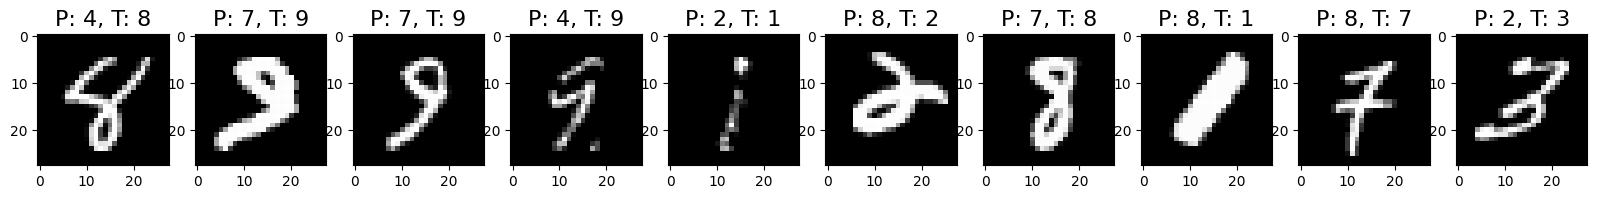

In [32]:
import random

idx_to_check = [y_error_indexes[random.randint(0, len(y_error_indexes)-1)] for _ in range(10)]

num_classes = 10

f, ax = plt.subplots(1, num_classes, figsize=(20, 20))

for i, idx in enumerate(idx_to_check):
    sample = x_test[idx]
    predicted_value = y_predicted_labels[idx]
    true_value = y_test[idx]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title(f'P: {predicted_value}, T: {true_value}', fontsize=16)

In [33]:
model2 = keras.Sequential(
    [
        keras.layers.Dense(200, input_shape=(784, ), activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')
    ]
)

model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model2.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2375 - accuracy: 0.9316
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0969 - accuracy: 0.9708
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0660 - accuracy: 0.9800
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0474 - accuracy: 0.9852
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0360 - accuracy: 0.9887


In [35]:
y_predicted = model2.predict(x_test_flattened)

313/313 [==============================] - 0s 713us/step


In [37]:
y_predicted[0]

array([2.7138276e-03, 1.8647985e-04, 3.8276592e-01, 9.5357615e-01,
       1.0236168e-07, 1.1308832e-02, 1.6018248e-08, 9.9999630e-01,
       1.4594431e-02, 2.5362594e-02], dtype=float32)

In [36]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [38]:
y_predicted_labels[0]

7

In [39]:
cm2 = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm2

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    0,    1,    0,    0,    0,    2,    1,    2,    0],
       [   0, 1122,    4,    1,    0,    1,    3,    0,    4,    0],
       [   6,    1, 1005,    3,    0,    0,    6,    5,    6,    0],
       [   0,    1,    2,  992,    0,    2,    0,    3,    4,    6],
       [   1,    1,    4,    1,  951,    0,    8,    2,    2,   12],
       [   3,    0,    0,    7,    1,  874,    4,    1,    1,    1],
       [   5,    2,    0,    1,    1,    2,  946,    0,    1,    0],
       [   1,    6,    8,    3,    1,    0,    0, 1000,    3,    6],
       [   4,    0,    1,    4,    2,    2,    5,    2,  949,    5],
       [   2,    2,    0,    6,    6,    1,    1,    6,    1,  984]])>

Text(95.72222222222221, 0.5, 'Truth')

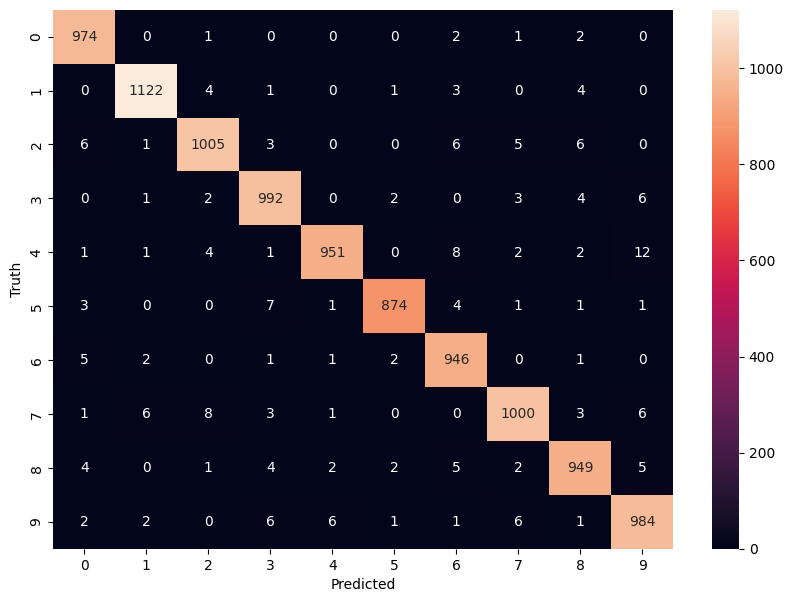

In [40]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm2, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [41]:
errors = (y_predicted_labels - y_test != 0)
errors

array([False, False, False, ..., False, False, False])

In [42]:
y_error_indexes = [i for i, error in enumerate(errors) if error]

In [43]:
len(y_error_indexes)

203